In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.Load dataset and identify missing values using .isnull().sum().

In [5]:
df=pd.read_csv('/content/housing.csv')

In [6]:
missing_num=df.isnull().sum()
print(missing_num)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


2.Visualize missing data patterns using simple bar charts

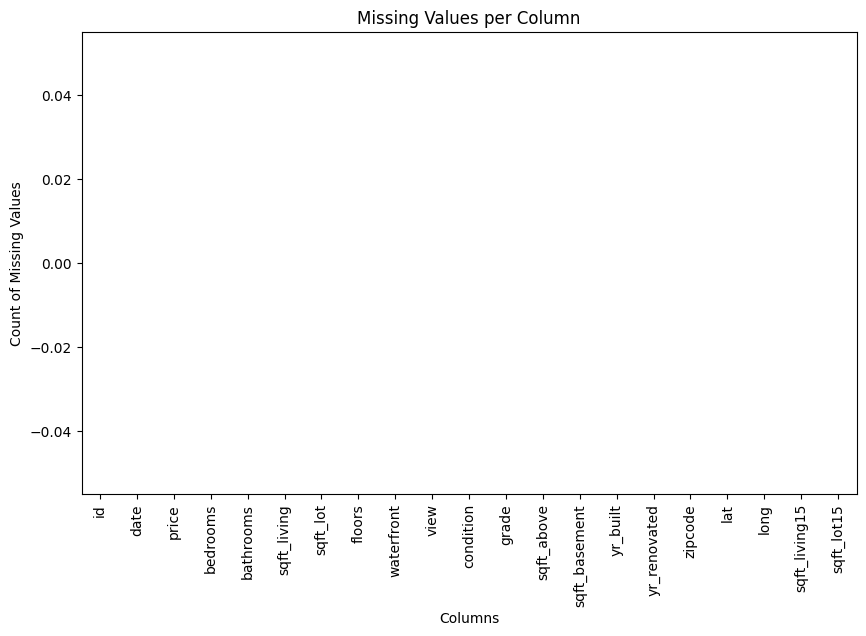

In [7]:
missing_num.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Columns")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()

3.Apply mean/median imputation for numerical columns.

In [8]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
print(num_cols)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)  # median is often safer

4.Impute categorical Columns

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

5.Remove columns with extremely high missing values.

In [12]:
threshold = 0.4  # if more than 40% missing, drop column
high_missing= missing_num[missing_num/len(df) > threshold].index
df.drop(columns=high_missing, inplace=True)

6. Validate Dataset After Cleaning

In [13]:
print(df.isnull().sum().sum())  # should be 0
print(df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long

7. Compare Before vs After Dataset Size & Quality

In [16]:
print("Original shape:",df.shape)
print("Cleaned shape:", df.shape)

Original shape: (21613, 21)
Cleaned shape: (21613, 21)


In [17]:
print(df.describe())
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

cleaned the saved data set in csv format

In [19]:
df.to_csv("house_prices_cleaned.csv", index=False)# A new data set is shown in the files dialog box